## Simulate Data 

To generate the dataset GAUSSMIXTURE, we sampled k=5 centers from a 15-dimensional spherical Gaussian distribution with mean at the origin and variance $R\in \{1,10,100 \}$ and then added points from Gaussian distributions with unit variance around each center.

In [50]:
## Simulate data
k = 20
n = 10000
d = 15

## simulate k centers from 15-dimensional spherical Gaussian distribution 
mean = np.hstack(np.zeros((d,1)))
cov = np.diag(np.array([1,10,100]*5))
centers = np.random.multivariate_normal(mean, cov, k)

## Simulate n data
for i in range(k):
    mean = centers[i]
    if i == 0:
        data = np.random.multivariate_normal(mean, np.diag(np.ones(d)), int(n/k+n%k))
        trueLabels = np.repeat(i,int(n/k+n%k))
    else:
        data = np.append(data, np.random.multivariate_normal(mean, np.diag(np.ones(d)) , int(n/k)), axis = 0) 
        trueLabels = np.append(trueLabels,np.repeat(i,int(n/k)))

In [52]:
data.shape

(10000, 15)

## KMeans




In [36]:
def KMeans(data, k, centroids, max_iter = 10000): 
    
    """ Apply the KMeans clustering algorithm
    
    Parameters:
      data                        ndarrays data 
      k                           number of cluster
      centroids                   initial centroids
    
    Returns:
      "Iteration before Coverge"  time used to converge
      "Centroids"                 the final centroids finded by KMeans    
      "Labels"                    the cluster of each data   
    """
    
    n = data.shape[0] 
    iterations = 0
    
    while iterations < max_iter:        
        ## calculate distence between each point to the three centroids
        dist = np.sum((data[:, np.newaxis, :] - centroids)**2, axis=2)
        
        ## give cluster label to each point 
        cluster_label = np.argmin(dist, axis=1)
        
        ## calculate new centroids
        newCentroids = np.zeros(centroids.shape)
        for j in range(0, k):
            if sum(cluster_label == j) == 0:
                newCentroids[j] = centroids[j]
            else:
                newCentroids[j] = np.mean(data[cluster_label == j, :], axis=0)
        
        ## Check if it is converged
        if np.array_equal(centroids, newCentroids):
            print("Converge")
            break 
            
        centroids = newCentroids
        iterations += 1
        
    return({"Iteration before Coverge": iterations, 
            "Centroids": centroids, 
            "Labels": cluster_label})

In [53]:
centroids_initial = data[np.random.choice(range(data.shape[0]), k, replace=False),:]
output_k = KMeans(data, k, centroids_initial)

Converge


Converge


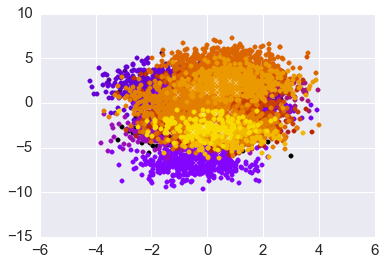

In [48]:
## plot
centroids = data[np.random.choice(range(data.shape[0]), k, replace=False),:]

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, k)

result1 = KMeans(data,k,centroids)
centroids1 = result1["Centroids"]
labels1 = result1["Labels"]

for i,color in enumerate(colors,start =1):
    plt.scatter(data[labels1==i, :][:,0], data[labels1==i, :][:,1], color=color)

for j in range(k):
    plt.scatter(centroids1[j,0],centroids1[j,1],color = 'w',marker='x')    
